# CIM Applause analysis
analysis of audience clapping captured during the MusicLab Copenhagen concert experiment for the presentation at CIM 2022

### Participatory applause: Interactions of audience members clapping at the end of a classical music concert

*
According to musicological studies of audience culture, applause is the most overt form of participation allowed to the collections of individuals attending classical music concerts (Brandl-Risi, 2011; Small, 1998; Tröndle, 2020). The final round of applause can exhibit many interesting dynamics related to their collective enthusiasm for the performance (Lupyan & Rifkin, 2003), the local applause culture, and what is on stage during the clapping. 


*
Quantitative empirical study of group clapping behaviours has principally depended on participants clapping on request in laboratory settings or A/V recordings from concerts (Neda, 2000) and presentations (Mann et al., 2013). To study the coordination involved in this collective behaviour, we need accurate measurements of individuals clapping voluntarily in a real concert setting.

*
To describe how the appreciative audience members adjust their clapping to each other and the action on stage during the final round of applause, demonstrating their participation at a concert’s end.

*
After the Danish String Quartet (DSQ) performed their last piece at the Music Lab Copenhagen Concert, the audience clapped continuously for nearly two minutes. During that time, the musicians stood and bowed, had scientific instruments removed from their bodies, left the stage, returned to bow again, and finally left the stage for good. The clapping action of individual participants in this concert experiment was captured by a mobile phone on their chests, and these recordings show how individuals’ clapping contributed to the collective effect shared with the musicians. 

Through the final applause interval, 70 devices captured clear clap sequences, representing over half of the audience at this chamber performance. In some ways, their applause followed expected patterns for a concert audience. They began to applaud over a very short time interval (Mann et al., 2013), more than half starting within less than a second of each other. After 20 s of independent clapping at rates from under 120 BMP to over 200 BPM, the participants shifted to clapping together on a shared beat, a practice that is common for Danish audiences. This group maintained synchrony for over a minute while steadily accelerating from around 158 BMP to 176 BMP, an expected consequence of mutual adaptation during group clapping (Thomson et al., 2018). The coordinated action was strongest while the musicians were on the stage but a subset of independent clapping broke out while the audience waited for the performers to return for their final round of bows. 

Participants’ claps were evaluated from two perspectives: the alignment of claps, reflecting the dominant shift from independence to coordination, and the distribution of participants’ clapping rates over time. Despite some measurement challenges, the shift from independent to coordinate clapping emerges strongly from participants’ movements, with the median rate of clapping slowing until a dominant beat takes hold. Individuals’ clap sequences confirm that the independent clapping at the start of the applause is a result of individual participants clapping isochronously at their own rate, separate in rate and phase from their neighbours in the hall. When the audience claps together, they are voluntarily adjusting to the dominant rate and phase of the people in the hall, with little change in the quality of their isochronous clapping action. Drift in the synchronised clapping rate reflects mutual attentiveness while variation in the number of participants contributing to the coordinated claps suggests differences in applause strategy. Many participants opted to coordinate with their peers while some seemed to prioritise reacting to the musicians. 


*
The audience is composed of individuals, each with their own experiences and opinions of a performance. Scientific analysis has often reduced this diversity to a single narrative. Here we observe categories of behaviour that are of interest because of the individuality being negotiated by audience members as they adapt to each other and performers on stage. Their agency aggregates into a familiar collective expression of appreciation, but with the right measurement and analysis tools, we can recognize both the group response and participants’ individual choices.


*
Brandl-Risi, B. (2011). Getting together and falling apart: Applauding audiences. Performance Research, 16(3):12–18.
Lupyan, G. and Rifkin, I. (2003). Dynamics of applause: Modeling group phenomena through agent interaction. In Proceedings of the Annual Meeting of the Cognitive Science Society, volume 25.
Mann, R. P., Faria, J., Sumpter, D. J., and Krause, J. (2013). The dynamics of audience applause. Journal of The Royal Society Interface, 10(85):20130466.
Néda, Z., Ravasz, E., Vicsek, T., Brechet, Y., and Barabási, A.-L. (2000). Physics of the rhythmic applause. Physical Review E, 61(6):6987.
Néda, Z., Nikitin, A., and Vicsek, T. (2003). Synchronization of two-mode stochastic oscillators: a new model for rhythmic applause and much more. Physica A: Statistical Mechanics and its Applications, 321(1-2):238–247.
Small, C. (1998). Musicking: The meanings of performing and listening. Wesleyan University Press.
Thomson, M., Murphy, K., and Lukeman, R. (2018). Groups clapping in unison undergo size-dependent error-induced frequency increase. Scientific reports, 8(1):1–9.
Tröndle, M. (2020). A concert theory. In Classical Concert Studies, pages 11–28. Routledge.


In [1]:
import sys
import os
import time
import datetime as dt
import math
import numpy as np 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy.signal import butter,filtfilt
from scipy import interpolate
from scipy.interpolate import interp1d
import imageio

/Users/finn/.pyenv/versions/3.9.0/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
# import activity analysis functions from aa.py file in the same folder as this jupiter notebook
%load_ext autoreload
%autoreload 1
%aimport aa

In [15]:
%reload_ext autoreload

### file access

In [16]:
# Now to map those values to locations, need to import some details.
# these are old ID codes, need to replace. 
general_loc = 'C:/Users/finnu/OneDrive - Universitetet i Oslo/Documents/Mobile_data/'

internal_mlmotion = general_loc + 'Internal/Motion_ML/'
internal_ax3 = general_loc +  'Internal/Motion_AX3/'
internal_Part = general_loc + 'Internal/Participants/'
internal_time = general_loc + 'Internal/Timing/'

public_mlmotion = general_loc + 'Public/Motion_ML/'
public_ax3 = general_loc +  'Public/Motion_AX3/'
public_Part = general_loc + 'Public/Participants/'
public_time = general_loc + 'Public/Timing/'

In [17]:
partDets = pd.read_csv(internal_Part + 'Audience_Mapping_Internal.csv')#,index_col = 0,header_col = 0)
# need only in person participants so cut to those in attendence with seats assinged
partDets = partDets.loc[~partDets['X'].isna(),:]
MovingParts = partDets.loc[partDets['Motion_Quality'].isin(['Q','R']),:].reset_index(drop = True) # with aligned motion measurements

Part_Codes = list(MovingParts.Participant_Code.values)


In [18]:
Near_Rels = pd.read_csv(public_Part + 'Near_Participants_Hall.csv')

# reduce to list of relationships included in the dataset available here
Sub_Rels = Near_Rels.loc[Near_Rels['Participant_Code_1'].isin(Part_Codes),:]
Sub_Rels = Sub_Rels.loc[Sub_Rels['Participant_Code_2'].isin(Part_Codes),:].reset_index(drop = True)
#Sub_Rels

In [5]:
claps_folder = './Data/clapping_data/clapping_peaks'

os.listdir(claps_folder)

['between_frederik_simon_talks_peaks.csv',
 'musicians_back_to_stage_for_schnittke_peaks.csv',
 'when_musicians_appear_before_the_introduction_peaks.csv',
 'bach_peaks.csv',
 'schnittke_peaks.csv',
 'folk_music_1_peaks.csv',
 'beethoven_peaks.csv',
 'folk_music_4_peaks.csv',
 'musicians_back_after_intermission_peaks.csv',
 'folk_music_2_peaks.csv',
 'after_the_introduction_before_the_concert_begins_peaks.csv',
 'folk_music_5_peaks.csv',
 'final_peaks.csv',
 'a_short_clapping_between_speeches_peaks.csv',
 'folk_music_3_peaks.csv']

In [36]:
#df_motion.index=(pd.to_datetime(df_motion.index))
applause_times = pd.read_csv('data/Applause_Moments.csv',sep=",") #SV alignment for beeps
# need to add datetime
Start_time = pd.to_datetime('2021-10-26 17:30:00+0000').replace(tzinfo=None)
Synch_time = pd.to_datetime('2021-10-26 17:48:06+0000').replace(tzinfo=None)
Mid_time = pd.to_datetime('2021-10-26 19:00:00+0000').replace(tzinfo=None)
End_time = pd.to_datetime('2021-10-26 20:30:00+0000').replace(tzinfo=None)

applause_times['datetime'] = Synch_time + pd.to_timedelta(applause_times['concert_time'],'s')
applause_times

,Stream_Time,concert_time,Applause_N,Event,Event_Type,datetime
0,945.9,-688.50,0,Musicians enter hall,Musician_act,2021-10-26 17:36:37.500
1,946.0,-688.40,0,Clapping Start,First_Clap,2021-10-26 17:36:37.600
2,963.0,-671.40,0,Musicians seated,Musician_act,2021-10-26 17:36:54.600
3,963.1,-671.30,0,Clapping End,Last_Clap,2021-10-26 17:36:54.700
4,1081.0,-553.40,1,Last word V,Speach,2021-10-26 17:38:52.600
...,...,...,...,...,...,...
99,9757.0,8122.60,14,Bow 5,Musician_act,2021-10-26 20:03:28.600
100,9774.0,8139.60,14,Bow 6,Musician_act,2021-10-26 20:03:45.600
101,9776.0,8141.60,14,Start to leave stage,Musician_act,2021-10-26 20:03:47.600
102,9783.0,8148.60,14,Out of sight,Musician_act,2021-10-26 20:03:54.600


# Clap extraction
take one participants movements and show how claps were extracted

In [23]:
partDets = pd.read_csv(public_Part + 'Audience_Mapping_Public.csv')#,index_col = 0,header_col = 0)
# need only in person participants with aligned motion traces
partDets = partDets.loc[partDets['Attendance'] == 'A',:] # in person hall participant
alignedParts = partDets.loc[partDets['Motion_Quality'].isin(['Q','R']),:].reset_index(drop = True) # with aligned motion measurements
aligned_Part_Codes = list(alignedParts.Participant_Code.values)
alignedParts

,Participant_Code,Participant_Number,Attendance,Questionnaire_Language,Motion_Quality,Link_Conflicts,Seat_Zone,Location,Longitude_Truncated,Lattitude_Truncated,Offset_1,Offset_2,Watch_Alone
0,ADQ001,1,A,D,Q,0,6.0,NaN,NaN,NaN,0.14,0.16,0.0
1,ADQ002,2,A,D,Q,0,3.0,NaN,NaN,NaN,NaN,-0.36,0.0
2,ADQ003,3,A,D,Q,0,2.0,NaN,NaN,NaN,0.88,1.02,0.0
3,ADQ004,4,A,D,Q,0,4.0,NaN,NaN,NaN,0.44,0.62,1.0
4,ADQ005,5,A,D,Q,0,4.0,NaN,NaN,NaN,0.04,0.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,AEQ086,86,A,E,Q,0,5.0,NaN,NaN,NaN,NaN,0.34,0.0
81,AEQ087,87,A,E,Q,1,3.0,NaN,NaN,NaN,0.12,0.28,0.0
82,AEQ088,88,A,E,Q,0,2.0,NaN,NaN,NaN,0.10,0.06,0.0
83,AEQ089,89,A,E,Q,0,4.0,NaN,NaN,NaN,0.28,0.38,0.0


## Characterising last applause

In [174]:
# note these time are approximate to around the second, aligned roughly to final clapping excerpt times 
# Should be confirmed with better video interface than youtube
musician_times = pd.read_csv('./Data/Final_clapping_section_accelerometer/Final_Stage_events.csv',sep=",") #SV alignment for beeps
thisround = applause_times.loc[applause_times['Applause_N']==14,:].reset_index(drop=True)
# TIME LABEL
musician_times = pd.DataFrame()
musician_times['TIME'] = thisround.loc[:,'concert_time']-thisround.loc[thisround['Event']=='Clapping Start','concert_time'].values#+25
musician_times['LABEL'] = thisround['Event']
musician_times=musician_times.iloc[:-1,:]
musician_times

,TIME,LABEL
0,-1.0,Last note
1,0.0,Clapping Start
2,0.5,Musicians all standing
3,4.5,Bow 1
4,11.5,Bow 2
5,18.2,Claps begin to sync
6,19.5,Remove equipement
7,21.8,Claps in synch
8,33.5,Bow 3
9,43.5,Bow 4


In [12]:
thisround

,Stream_Time,concert_time,Applause_N,Event,Event_Type,datetime
0,9678.5,8044.10,14,Last note,Music,2021-10-26 20:02:10.100
1,9679.5,8045.10,14,Clapping Start,First_Clap,2021-10-26 20:02:11.100
2,9680.0,8045.60,14,Musicians all standing,Musician_act,2021-10-26 20:02:11.600
3,9684.0,8049.60,14,Bow 1,Musician_act,2021-10-26 20:02:15.600
4,9691.0,8056.60,14,Bow 2,Musician_act,2021-10-26 20:02:22.600
5,9697.7,8063.30,14,Claps begin to sync,Audience_sync,2021-10-26 20:02:29.300
6,9699.0,8064.60,14,Remove equipement,Musician_act,2021-10-26 20:02:30.600
7,9701.3,8066.90,14,Claps in synch,Audience_sync,2021-10-26 20:02:32.900
8,9713.0,8078.60,14,Bow 3,Musician_act,2021-10-26 20:02:44.600
9,9723.0,8088.60,14,Bow 4,Musician_act,2021-10-26 20:02:54.600


In [99]:
claps_folder = './Data/new_indexp/clapping_peaks'

In [102]:
peaks

,ADQ001,ADQ002,ADQ003,ADQ004,ADQ005,ADQ006,ADQ007,ADQ008,ADQ009,ADQ010,...,AEQ081,AEQ082,AEQ083,AEQ084,AEQ085,AEQ086,AEQ087,AEQ088,AEQ089,AER090
index,,,,,,,,,,,,,,,,,,,,,
2021-10-26 20:02:05.259999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-26 20:02:05.279999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-26 20:02:05.299999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-26 20:02:05.319999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-26 20:02:05.339999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-26 20:03:53.199999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.552654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-26 20:03:53.219999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-26 20:03:53.239999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
peaks = pd.read_csv(claps_folder + '/final_peaks.csv',index_col=0)

peaks.index=(pd.to_datetime(peaks.index)).replace(tzinfo=None)
peaks = peaks.fillna(0)
#peaks.drop(columns=['index'],inplace = True)
peaks_IDs = peaks.columns
#ts = pd.Series(np.arange(0,len(peaks))*0.02)-1.0 # one second offset from peak picking process. See clapping_motion
ts = pd.Series(np.arange(0,len(peaks))*0.02)-1.0 
df_claps = pd.DataFrame(index = ts,columns = peaks_IDs,data = peaks.values)
#df_claps = peaks #pd.DataFrame(index = ts,columns = peaks_IDs,data = peaks.values)
df_claps.plot(figsize = [12,3],legend = False)
plt.xticks(musician_times.TIME,musician_times.LABEL, rotation='vertical')
#plt.xticks(musician_times.datetime,musician_times.Event, rotation='vertical')
plt.ylim([0,50])
plt.show()

# drop the clap amplitude for simpler analysis and count claps per participant
df_OnlyClaps = df_claps.astype(bool).astype(int)
df_OnlyClaps.sum().hist(bins = 40)
plt.title('Number of claps per participant')
plt.show()

AttributeError: 'DatetimeIndex' object has no attribute 'replace'

In [126]:
thisround = applause_times.loc[applause_times['Applause_N']==14,:].reset_index(drop=True)

thisround.index=pd.to_datetime(thisround.datetime).dt.tz_localize("UTC")#+pd.to_timedelta(thisround.datetime[0])
#pd.to_datetime(df['Date']).dt.tz_localize('US/Eastern')
thisround=thisround.iloc[:-1,:]

peaks = pd.read_csv(claps_folder + '/final_applause_peaks.csv',index_col=0)
ts=(pd.to_datetime(peaks.index)-pd.to_datetime(peaks.index[0]) + thisround.datetime[0] - pd.to_timedelta(6,'S'))#.replace(tzinfo=None)
peaks = peaks.fillna(0)
df_claps = pd.DataFrame(index = ts,columns = peaks_IDs,data = peaks.values)
df_claps.index = pd.to_datetime(df_claps.index).tz_localize("UTC")
df_claps 

In [177]:
peaks = pd.read_csv(claps_folder + '/final_applause_peaks.csv',index_col=0)
peaks = peaks.fillna(0)
peaks_IDs = peaks.columns
ts = pd.Series(np.arange(0,len(peaks))*0.02)-3.0 # there is something that has gone sideways when trying to reindex. This offset compensates for graphing clarity
df_claps = pd.DataFrame(index = ts,columns = peaks_IDs,data = peaks.values)
#df_claps = peaks #pd.DataFrame(index = ts,columns = peaks_IDs,data = peaks.values)
#df_claps.index = pd.to_datetime(df_claps.index).tz_localize("UTC")+ pd.to_timedelta(3,'S')
df_claps.iloc[:5,:] 

,ADQ001,ADQ002,ADQ003,ADQ004,ADQ005,ADQ006,ADQ007,ADQ008,ADQ009,ADQ010,...,AEQ081,AEQ082,AEQ083,AEQ084,AEQ085,AEQ086,AEQ087,AEQ088,AEQ089,AER090
-3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


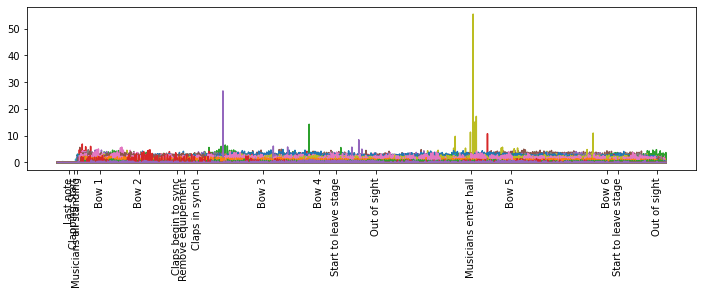

In [178]:
df_claps.plot(figsize = [12,3],legend = False)
#plt.xticks(thisround.index,thisround.Event, rotation='vertical')
plt.xticks(musician_times.TIME,musician_times.LABEL, rotation='vertical')

plt.show()

[85, 69]


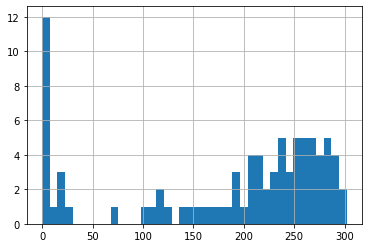

In [179]:
# reduce the analysis set to only those recordings with a minimum number of claps for this interval (20).
df_OnlyClaps = df_claps.astype(bool).astype(int)
df_OnlyClaps.sum().hist(bins = 40)
a = df_OnlyClaps.sum().index
print([len(a),len(a[df_OnlyClaps.sum()>20])])

# reduce analysis set to only those responses with claps detected
df_claps = df_claps.loc[:,a[df_OnlyClaps.sum()>20]]
claps_ID = df_claps.columns# the participant identifiers matching df_clap columns, in case of need
#df_claps.columns = range(df_claps.columns.size)
df_OnlyClaps = df_claps.astype(bool).astype(int)

In [180]:
df_claps.iloc[200:400]

,ADQ001,ADQ002,ADQ003,ADQ004,ADQ005,ADQ006,ADQ007,ADQ008,ADQ009,ADQ010,...,ADR070,ADR071,AEQ079,AEQ081,AEQ082,AEQ086,AEQ087,AEQ088,AEQ089,AER090
1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
1.02,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,3.276868,0.00000,0.000000,0.0,0.0,0.0,0.0
1.04,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
1.06,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
1.08,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.90,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,3.08352,0.000000,0.0,0.0,0.0,0.0
4.92,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
4.94,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,...,1.558225,0.0,0.0,0.000000,0.00000,1.094818,0.0,0.0,0.0,0.0
4.96,0.0,0.0,0.0,0.0,0.0,0.0,3.00217,1.86364,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0


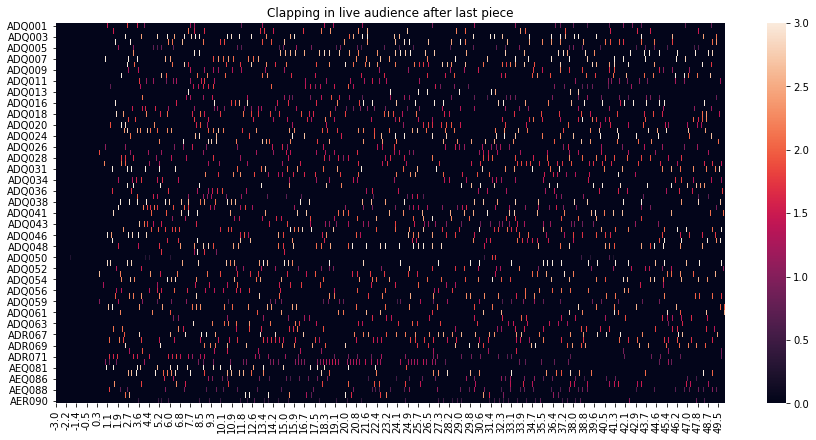

In [217]:
fig, ax = plt.subplots(figsize = [15,7])
chart = sns.heatmap(data=df_claps.loc[-3.0:50,:].transpose(), ax=ax,vmin=0, vmax=3)

plt.title('Clapping in live audience after last piece')
ax.set_xticklabels([])
ax.set_xticklabels(np.round(0+df_claps.iloc[ax.get_xticks()].index,1))
plt.savefig('claps_finale_indiv.png',dpi=800)
plt.show()

# this visualisation does not necessarily show all claps, nor is it easy to interpret their alignment.
# use activity levels instead.

Median time to start clapping: 1.0s
Inner quartile range: 0.8s


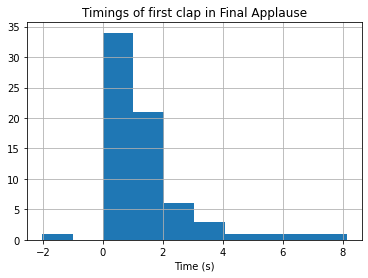

In [185]:
# Time to first clap.
first_claps =df_claps.ne(0).idxmax()
fig = first_claps.hist()
plt.xlabel('Time (s)')
plt.title('Timings of first clap in Final Applause')

print('Median time to start clapping: ' + str(np.round(first_claps.median(),3)) + 's\nInner quartile range: ' + str(np.round(first_claps.quantile(0.75)-first_claps.quantile(0.25),3)) + 's')

In [186]:
last_claps =df_claps.where(df_claps!=0).last_valid_index()
last_claps

105.0

In [187]:
# demonstrate coordination 
actType = 'UBound'
HopSize = 0.02
Thresh = 0.5
FrameSize = 0.1
Acts=aa.activityCount(df_claps,FrameSize,HopSize,Thresh,actType)
Acts= Acts.fillna(0)
# include performers
Data = Acts.drop(columns=['Total']) # we drop the ratio to just have the sampled events 
                                    # for the nonparametric local activity test
    
ShuffleRange = 1
Iter = 1000
alpha = 0.005
tic = time.time()
stest = aa.localActivityTest(Data,FrameSize,ShuffleRange,Iter,alpha)
print(time.time()-tic)
stest

A = stest['MeasuredResults']
B = stest['ActivityPeaks']
C = stest['CoordScore']
# plot the activity levels with local activity peaks
fig = A['Activity-levels'].plot(figsize=[20,4])
if C >=-np.log10(alpha):
    B['Activity-levels'].plot(style='r.')
else:
    B['Activity-levels'].plot(style='y.')
plt.ylim([0,59])
plt.xlim([6.5,121])
plt.xlabel('Time (s)')
plt.ylabel('Activity Counts')
plt.grid()
plt.title('Final Audience Applause Local activity in ' + str(FrameSize) + 's frames, Coordination score = '+str(round(stest['CoordScore'],3)))
plt.savefig('Applause_Final_Alignment_005_s.png',dpi = 400)
plt.show()


fig = A['Activity-levels'].plot(figsize=[20,4])
if C >=-np.log10(alpha):
    B['Activity-levels'].plot(style='r.')
else:
    B['Activity-levels'].plot(style='y.')
plt.ylim([0,59])
plt.xlim([6.5,121])
plt.xlabel('Time (s)')
plt.xticks(musician_times.TIME,musician_times.LABEL, rotation='vertical')
plt.xlabel('Musicians activities during applause (time~120s)')
plt.ylabel('Activity Counts')
plt.grid()
plt.title('Final Audience Applause Local activity in ' + str(FrameSize) + 's frames, Coordination score = '+str(round(stest['CoordScore'],3)))
plt.savefig('Applause_Final_Alignment_005_ME.png',dpi = 400)
plt.show()

KeyError: 0

In [188]:
df_OnlyClaps = df_claps.astype(bool).astype(int)

In [193]:
# build database of clapping stats over measured intervals
Clap_Style = pd.DataFrame(columns = ['Interval_start','Interval_duration','Interval_condition','Participant','ICI_Median','ICI_Quartiles','ICI_Mean','ICI_STD','Clap_Count'])
t_interval = 3
sampletimes = np.array([10, 14, 18, 20, 35, 50, 65, 80, 104,108,112])
sampletimes = sampletimes-5
sampleconditions = ['Initial','Initial','Initial','Initial','Synched','Synched','Synched','Synched','End','End','End']
for samp in range(len(sampletimes)):
    t_0 = sampletimes[samp]
    t_con = sampleconditions[samp]
    sub_claps = df_OnlyClaps.loc[t_0:t_0+t_interval,:] # Excerpt of claps
    clap_stats = []
    cols = sub_claps.columns
    for partn in cols:
        ici = pd.Series(sub_claps.loc[sub_claps.loc[:,partn]>0].index).diff()
        #if len(ici)>0:
        these_claps = {'Interval_start':t_0, 'Interval_duration':t_interval, 'Interval_condition':t_con,
           'Participant':partn, 'ICI_Median':ici.median(), 'ICI_Quartiles':np.round(ici.quantile(q=0.75,interpolation='nearest')-ici.quantile(q=0.25,interpolation='nearest'),5), 
           'ICI_Mean':ici.mean(), 'ICI_STD':ici.std(), 'Clap_Count':len(ici)}
        clap_stats.append(these_claps)
    Clap_Style = pd.concat([Clap_Style, pd.DataFrame(clap_stats)], ignore_index=True)
    
# to_numeric
cols = ['ICI_Mean','ICI_Median','ICI_Quartiles','ICI_STD']
for c in cols:
    Clap_Style.loc[:,c] = pd.to_numeric(Clap_Style[c])

/Users/finn/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/finn/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/finn/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/finn/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/finn/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Users/finn/.pyenv/versions/3.9.0/lib/python3.9/site-packages/num

In [194]:
# clear out nans in case they make the functions panic
cstats = Clap_Style.where(Clap_Style['Clap_Count']>0)
cstats = cstats.dropna()

In [195]:
Clap_Style['ICI_Median'].sum()

216.08000000000018

ICI_Median
                      Source      W  ddof1  ddof2      F  p-unc
Friedman  Interval_condition  0.101   1.96  96.04  5.493  0.006


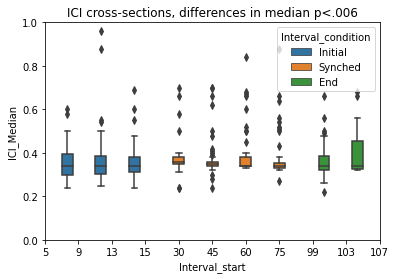


ICI_Quartiles
                      Source      W  ddof1  ddof2      F  p-unc
Friedman  Interval_condition  0.014   1.96  96.04  0.707  0.493


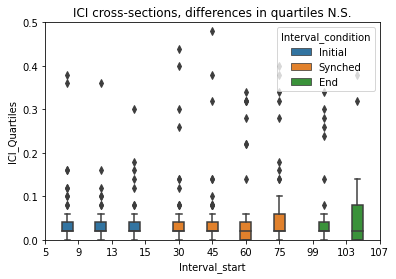

In [203]:
#https://pingouin-stats.org/generated/pingouin.friedman.html#pingouin.friedman
aov = pg.friedman(dv='ICI_Median', within='Interval_condition',
                  subject='Participant', method = 'f',data=Clap_Style)
print('ICI_Median')
print(aov.round(3))
sns.boxplot(x = "Interval_start",y="ICI_Median",hue = 'Interval_condition',width = 1,data = Clap_Style)
plt.ylim([0,1])
plt.xlim([0,10])
plt.title('ICI cross-sections, differences in median p<.006')
plt.savefig('Intervals_Xsec_Medians.png',dpi=400)

plt.show()
#https://pingouin-stats.org/generated/pingouin.friedman.html#pingouin.friedman
aov = pg.friedman(dv='ICI_Quartiles', within='Interval_condition',
                  subject='Participant', method = 'f',data=Clap_Style)
print('\nICI_Quartiles')
print(aov.round(3))
sns.boxplot(x = "Interval_start",y='ICI_Quartiles',hue = 'Interval_condition',width = 1,data = Clap_Style)
plt.ylim([0,0.5])
plt.xlim([0,10])
plt.title('ICI cross-sections, differences in quartiles N.S.')
plt.savefig('Intervals_Xsec_Quartiles.png',dpi=400)
plt.show()

This demonstrates that the clapping does seem to change in rate marginally for some applause periods, and there is a visible change in variance across participants during the synchronous clapping interval, however there is no measured difference in variability in individuals clapping over this interval.

This means that prior to synchronisation, individuals clapping sequences were comparably stable or isochronous. Clapping together did not improve the regularity of the audience participants claps *according to the precision of these measurements* with a sample rate of 20 ms, very coarse for this kind of analysis. 

# Shift into synchrony
The alignment of the measurements is not quite high enough to evaluate synchronisation with phase presevered. To facilitate the identification of the transition to coordinated claping, we use instead the local median interclapinterval: the predominant interval between claps in a sliding window of 3 secondes, to capture the regularity despite fleeting outliers and deviations. 

We use the interclap interval instead of rate to simplify some manipulations. 

In [204]:
df_OnlyClaps.index = (np.arange(0,len(df_OnlyClaps.index))/50)-1

In [205]:
# build database of clapping behaviour over measured intervals
t_interval = 1.5
sampletimes = np.arange(0+t_interval,121-t_interval,0.5)
Clap_Feats = pd.DataFrame(index = sampletimes,columns = df_OnlyClaps.columns)

for samp in range(len(sampletimes)):
    t_0 = sampletimes[samp]
    sub_claps = df_OnlyClaps.loc[t_0-t_interval:t_0+t_interval,:] # Excerpt of claps
    clap_stats = []
    cols = sub_claps.columns
    these_claps = pd.Series(index = df_OnlyClaps.columns,dtype='float64')
    for partn in cols:
        ici = pd.Series(sub_claps.loc[sub_claps.loc[:,partn]>0].index,dtype='float64').diff()
        if ici.notna().sum()>0:
            these_claps[partn]=np.nanmedian(ici)
    Clap_Feats.loc[t_0,:] = these_claps
Clap_Feats.loc[25:30]

,ADQ001,ADQ002,ADQ003,ADQ004,ADQ005,ADQ006,ADQ007,ADQ008,ADQ009,ADQ010,...,ADR070,ADR071,AEQ079,AEQ081,AEQ082,AEQ086,AEQ087,AEQ088,AEQ089,AER090
25.0,0.36,0.36,0.38,0.36,0.36,0.36,0.36,0.34,0.41,0.37,...,0.7,0.38,0.22,0.27,0.32,0.38,0.4,0.28,0.42,1.33
25.5,0.36,0.36,0.38,0.38,0.38,0.36,0.36,0.34,0.38,0.36,...,0.74,0.38,0.22,0.28,0.32,0.37,0.4,0.28,0.42,0.86
26.0,0.38,0.35,0.38,0.38,0.38,0.4,0.38,0.38,0.38,0.38,...,0.7,0.38,0.22,0.28,0.32,0.35,0.41,0.28,0.34,0.4
26.5,0.38,0.34,0.38,0.36,0.38,0.4,0.38,0.38,0.37,0.38,...,0.7,0.36,0.22,0.28,0.32,0.34,0.4,0.29,0.49,0.38
27.0,0.38,0.34,0.38,0.36,0.38,0.4,0.38,0.38,0.36,0.38,...,0.66,0.36,0.22,0.28,0.32,0.34,0.41,0.3,0.42,0.38
27.5,0.38,0.34,0.38,0.38,0.38,0.4,0.38,0.38,0.36,0.38,...,0.7,0.36,0.22,0.29,0.32,0.34,0.4,0.36,NaN,0.4
28.0,0.36,0.34,0.37,0.38,0.38,0.38,0.38,0.38,0.37,0.38,...,0.66,0.34,0.24,0.28,1.32,0.34,0.38,0.38,NaN,0.42
28.5,0.36,0.34,0.36,0.36,0.37,0.36,0.38,0.38,0.4,0.38,...,0.84,0.33,0.24,0.3,0.38,0.34,0.38,0.36,NaN,0.42
29.0,0.36,0.35,0.36,0.36,0.38,0.36,0.38,0.36,0.4,0.38,...,0.84,0.32,0.24,NaN,0.37,0.34,0.37,0.37,NaN,0.46
29.5,0.36,0.36,0.36,0.36,0.38,0.36,0.36,0.36,0.4,0.37,...,0.84,0.34,0.25,NaN,0.36,0.34,0.38,0.36,NaN,0.4


<AxesSubplot:title={'center':'Local claping ICI median, mean in black, std in red'}>

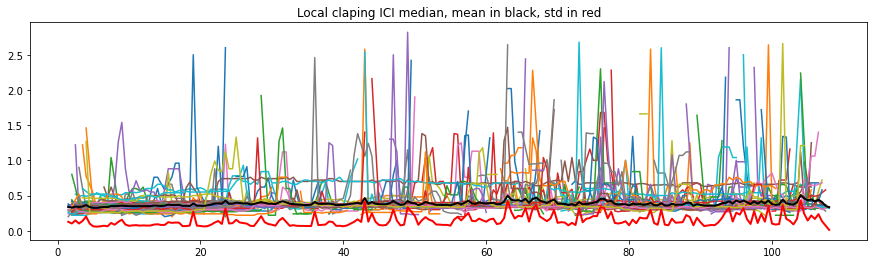

In [206]:
# to get an idea of what values these take
Clap_Feats.plot(legend=False,figsize=[15,4])
plt.title('Local claping ICI median, mean in black, std in red')
B = Clap_Feats.mean(axis=1)
B.plot.line(color = 'black',linewidth=2)
B = Clap_Feats.std(axis=1)
B.plot.line(color = 'red',linewidth=2)

The protruding lines show how many participants start a clapping sequences with a solo clap before getting into a stead rate. Also visible here is thea few people clapping at half the rate of the audience once a common rate has been established. Very neet. 

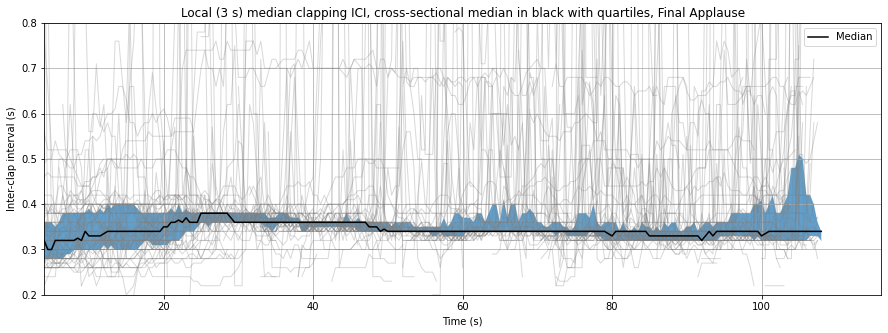

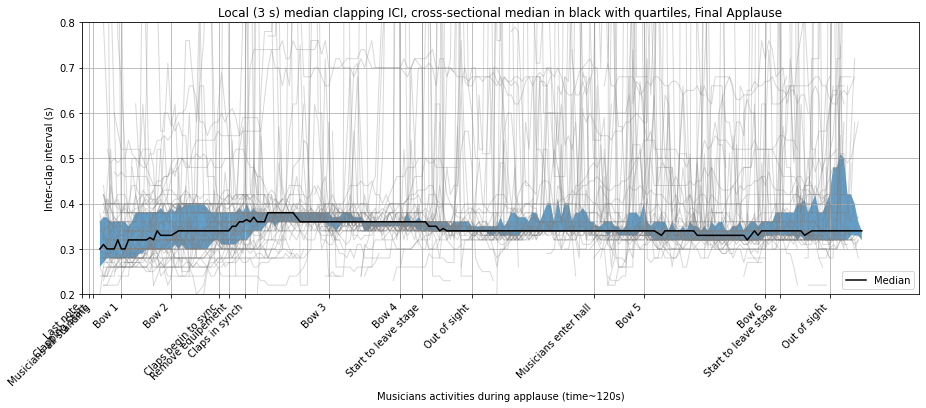

In [207]:
# pull out the quartile time series, allowing for nans
# 
df_A = Clap_Feats.copy()
df_feats = pd.DataFrame(index = df_A.index,columns= ['Median','LowerQ','UpperQ','Midrange','NotNa_C','NotNa_p'])
t_interval = 3

for i, row in df_A.iterrows():
    sub_row = row[row.notna()]
    if len(sub_row)>0:
        these_stats = {'Median':np.median(sub_row),'LowerQ':sub_row.quantile(q=0.25,interpolation='nearest'),'UpperQ':sub_row.quantile(q=0.75,interpolation='nearest'),
                       'Midrange':np.round(sub_row.quantile(q=0.75,interpolation='nearest')-sub_row.quantile(q=0.25,interpolation='nearest'),5),'NotNa_C':len(sub_row),'NotNa_p':len(sub_row)/len(row)}
        df_feats.loc[i,:] = these_stats
df_feats = df_feats.dropna()

#df_feats.loc[:10]

fig,ax = plt.subplots(1,1,figsize=[15,5])
df_A.plot(linewidth=1,color='grey',alpha=0.3,legend=False,ax = ax)
#ax.line(df_A.index,df_A)
df_feats.plot(y='Median',color="black", ax=ax)
x = np.array(df_feats.index)
y1 = np.array(df_feats.LowerQ,dtype=np.float32)
y2 = np.array(df_feats.UpperQ,dtype=np.float32)
ax.fill_between(x,y1,y2,alpha = 0.7)
plt.ylim([0.2,0.8])
plt.xlim([4,116])
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Inter-clap interval (s)')
plt.title('Local (3 s) median clapping ICI, cross-sectional median in black with quartiles, Final Applause')
plt.savefig('FinalApplause_Local_ICI_medians_QuartileTS.png',dpi=400)
plt.show()



fig,ax = plt.subplots(1,1,figsize=[15,5])
df_A.plot(linewidth=1,color='grey',alpha=0.3,legend=False,ax = ax)
#ax.line(df_A.index,df_A)
df_feats.plot(y='Median',color="black", ax=ax)
x = np.array(df_feats.index)
y1 = np.array(df_feats.LowerQ,dtype=np.float32)
y2 = np.array(df_feats.UpperQ,dtype=np.float32)
ax.fill_between(x,y1,y2,alpha = 0.7)
plt.ylim([0.2,0.8])
plt.xlim([4,116])
plt.xlabel('Time (s)')
plt.xticks(musician_times.TIME,musician_times.LABEL, rotation=45, ha='right')
plt.grid()
plt.xlabel('Musicians activities during applause (time~120s)')
plt.ylabel('Inter-clap interval (s)')
plt.title('Local (3 s) median clapping ICI, cross-sectional median in black with quartiles, Final Applause')
plt.savefig('FinalApplause_Local_ICI_medians_QuartileTS_MusEv.png',dpi=400)
plt.show()

<AxesSubplot:>

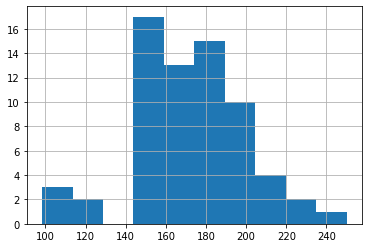

In [149]:
(60/Clap_Feats.loc[20]).hist()

<AxesSubplot:>

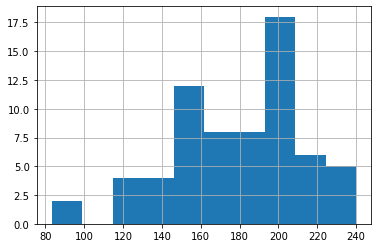

In [150]:
(60/Clap_Feats.loc[8]).hist()

<AxesSubplot:>

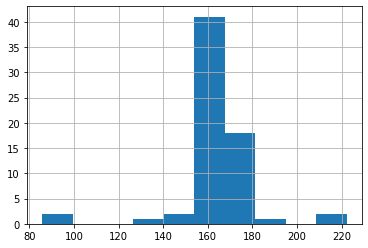

In [151]:
(60/Clap_Feats.loc[40]).hist()

<AxesSubplot:>

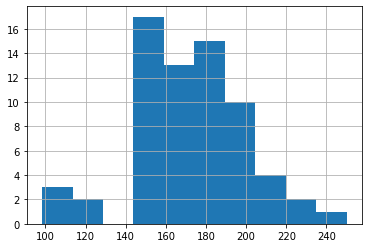

In [152]:
(60/Clap_Feats.loc[20]).hist()

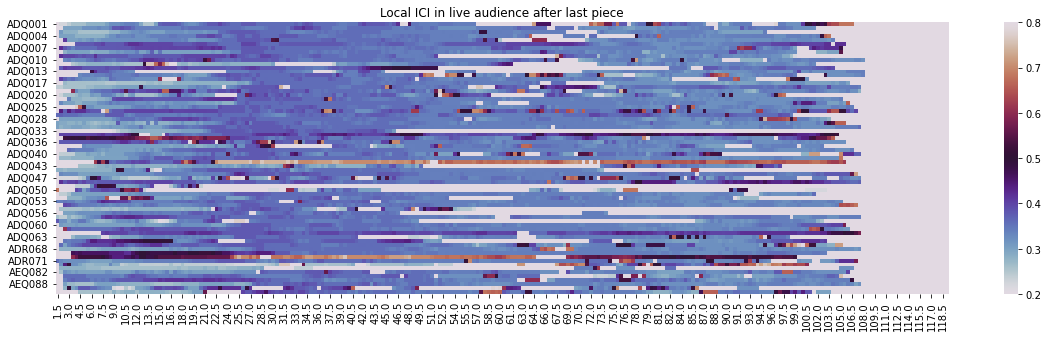

In [112]:
# now to show these as individual sequences
df_A = Clap_Feats.copy()
df_A.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize = [20,5])
chart = sns.heatmap(data=df_A.transpose(), ax=ax,vmin=0.2, vmax=0.8,cmap='twilight')

plt.title('Local ICI in live audience after last piece')
ax.set_xticklabels(np.round(df_A.iloc[ax.get_xticks()].index,2))
#plt.savefig('claps_finale_heatRough.png')
plt.show()


In [208]:
Clap_Feats

,ADQ001,ADQ002,ADQ003,ADQ004,ADQ005,ADQ006,ADQ007,ADQ008,ADQ009,ADQ010,...,ADR070,ADR071,AEQ079,AEQ081,AEQ082,AEQ086,AEQ087,AEQ088,AEQ089,AER090
1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.22,NaN,0.31,0.3,NaN,NaN,0.42,NaN,0.42,NaN,...,NaN,0.33,0.32,0.28,0.26,NaN,NaN,NaN,NaN,NaN
2.5,0.22,0.3,0.28,0.3,0.41,NaN,0.38,0.28,0.4,0.33,...,NaN,0.32,0.44,0.28,0.32,0.36,0.34,0.3,0.28,NaN
3.0,0.24,0.3,0.28,0.3,0.3,NaN,0.36,0.3,0.4,0.34,...,NaN,0.32,0.52,0.28,0.31,0.36,0.36,0.27,0.49,NaN
3.5,0.26,0.3,0.28,0.3,0.3,NaN,0.34,0.3,0.4,0.32,...,0.6,0.32,0.32,0.28,0.3,0.36,0.37,0.27,0.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


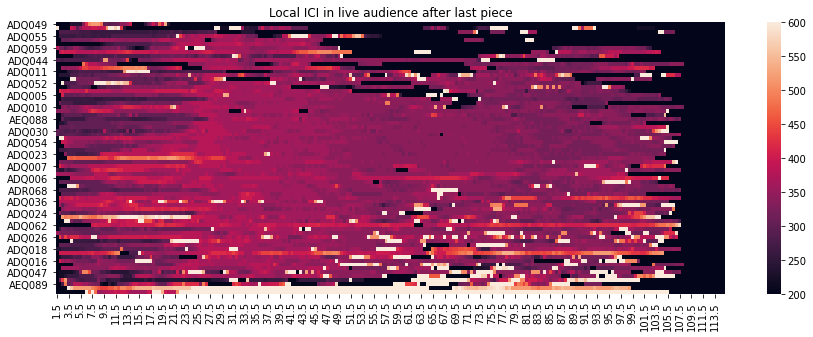

In [210]:
# now to show these as individual sequences
# sorted by distance from the median local ICI time series across audience, not absolute
#cm = plt.cm.get_cmap('twilight')
# df.filter(like='bbi', axis=0)
feat_set = Clap_Feats.loc[20:100].copy()
feat_set.fillna(0,inplace=True)
dists = abs(feat_set.sub(feat_set.median(axis=1),axis = 0)).sum()*np.sign(feat_set.sub(feat_set.median(axis=1),axis = 0).sum())

df_A = Clap_Feats[dists.sort_values().index].copy()*1000 # convert to milliseconds
df_A = df_A.loc[1.5:115]
df_A.fillna(1,inplace=True)
fig, ax = plt.subplots(figsize = [15,5])
chart = sns.heatmap(data=df_A.transpose(), ax=ax,vmin=200, vmax=600)
plt.title('Local ICI in live audience after last piece')
ax.set_xticklabels(np.round(df_A.iloc[ax.get_xticks()].index,2))
plt.savefig('claps_finale_heatRough.png')
plt.show()


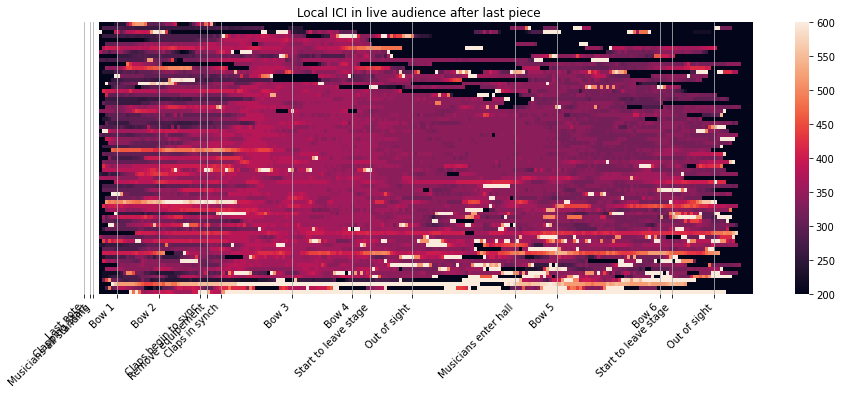

In [212]:
# now to show these as individual sequences
# sorted by distance from the median local ICI time series across audience, not absolute
#dists = Clap_Feats.sub(Clap_Feats.median(axis=1),axis = 0).sum()
feat_set = Clap_Feats.loc[30:100].copy()
feat_set.fillna(0,inplace=True)
dists = abs(feat_set.sub(feat_set.median(axis=1),axis = 0)).sum()*np.sign(feat_set.sub(feat_set.median(axis=1),axis = 0).sum())

df_A = Clap_Feats[dists.sort_values().index].copy()*1000 # convert to milliseconds
df_A.fillna(0,inplace=True)
df_A = df_A.loc[1.5:110]

# df_A.drop(61,axis = 1,inplace=True)
# df_A.drop(11,axis = 1,inplace=True)
fig, ax = plt.subplots(figsize = [15,5])
chart = sns.heatmap(data=df_A.transpose(), ax=ax,vmin=200, vmax=600)
plt.title('Local ICI in live audience after last piece')
ax.set_xticklabels(np.round(df_A.iloc[ax.get_xticks()].index,2))

plt.xticks(musician_times.TIME,musician_times.LABEL, rotation=45,ha='right')

new_xticks = len(df_A)*(musician_times.TIME-df_A.index[0])/(df_A.index[-1]-df_A.index[0])
# plt.xticks(new_xticks,seg_times.Event, rotation='20',fontsize=8)
ax.set_xticks(new_xticks)
ax.set_xticklabels(musician_times.LABEL)
ax.set_yticks([])
ax.grid()

plt.savefig('claps_ICI_finale_heatRoughsort_ME.png')
plt.show()


# contrast with Schnittke Applause

https://youtu.be/S4UVJybA6ZQ?t=5273

In [116]:
# note these time are approximate to around the second, aligned roughly to final clapping excerpt times 
# Should be confirmed with better video interface than youtube
musician_times = pd.read_csv('./Data/Final_clapping_section_accelerometer/Final_Stage_events.csv',sep=",") #SV alignment for beeps
thisround = applause_times.loc[applause_times['Applause_N']==5,:].reset_index(drop=True)
# TIME LABEL
musician_times = pd.DataFrame()
musician_times['TIME'] = thisround.loc[:,'concert_time']-thisround.loc[thisround['Event']=='Clapping Start','concert_time'].values#+25
musician_times['LABEL'] = thisround['Event']
musician_times

,TIME,LABEL
0,-11.5,Silence
1,-1.8,Release instruments
2,0.0,Clapping Start
3,16.2,Start to leave stage
4,28.2,Out of sight
5,37.2,Musicians enter hall
6,38.2,Claps in synch
7,52.2,Start to leave stage
8,60.2,Out of sight
9,60.4,Clapping End


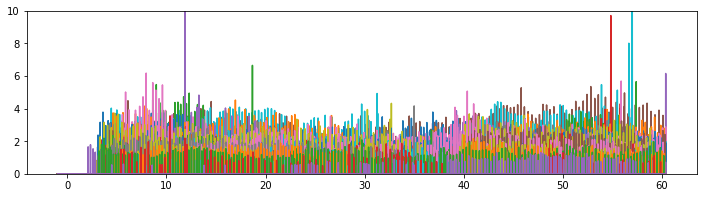

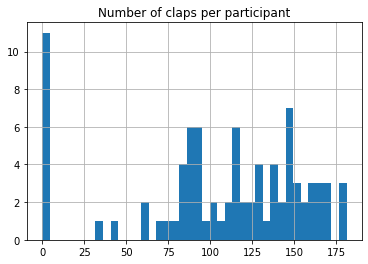

In [117]:
peaks = pd.read_csv(claps_folder + 'schnittke_applause_peaks.csv',index_col=0)
peaks = peaks.fillna(0)
#peaks.drop(columns=['index'],inplace = True)
peaks_IDs = peaks.columns
ts = pd.Series(np.arange(0,len(peaks))*0.02)-1
df_claps = pd.DataFrame(index = ts,data = peaks.values)
df_claps.plot(figsize = [12,3],legend = False)
plt.ylim([0,10])
plt.show()

# drop the clap amplitude for simpler analysis and count claps per participant
df_OnlyClaps = df_claps.astype(bool).astype(int)
df_OnlyClaps.sum().hist(bins = 40)
plt.title('Number of claps per participant')
plt.show()

In [122]:
# note these time are approximate to around the second, aligned roughly to final clapping excerpt times 
# Should be confirmed with better video interface than youtube
# musician_times = pd.read_csv(claps_folder + 'Schnittke_Stage_events.csv',sep=",") #SV alignment for beeps
# musician_times

In [118]:
# reduce the analysis set to only those recordings with a minimum number of claps for this interval (20).
a = df_OnlyClaps.sum().index
print([len(a),len(a[df_OnlyClaps.sum()>20])])

# reduce analysis set to only those responses with claps detected
df_claps = df_claps.loc[:,a[df_OnlyClaps.sum()>20]]
claps_ID = peaks_IDs[a[df_OnlyClaps.sum()>20]] # the participant identifiers matching df_clap columns, in case of need
df_claps.columns = range(df_claps.columns.size)
df_OnlyClaps = df_claps.astype(bool).astype(int)

[85, 74]


Median time to start clapping: 4.75s
Inner quartile range: 1.975s


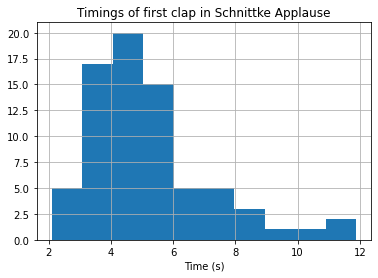

In [119]:
# Time to first clap.
first_claps =df_claps.ne(0).idxmax()
fig = first_claps.hist()
plt.xlabel('Time (s)')
plt.title('Timings of first clap in Schnittke Applause')

print('Median time to start clapping: ' + str(np.round(first_claps.median(),3)) + 's\nInner quartile range: ' + str(np.round(first_claps.quantile(0.75)-first_claps.quantile(0.25),3)) + 's')

In [120]:
last_claps =df_claps.where(df_claps!=0).last_valid_index()
last_claps

60.4

42.11709213256836


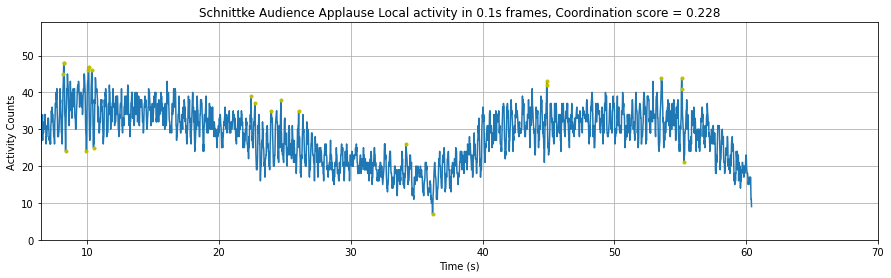

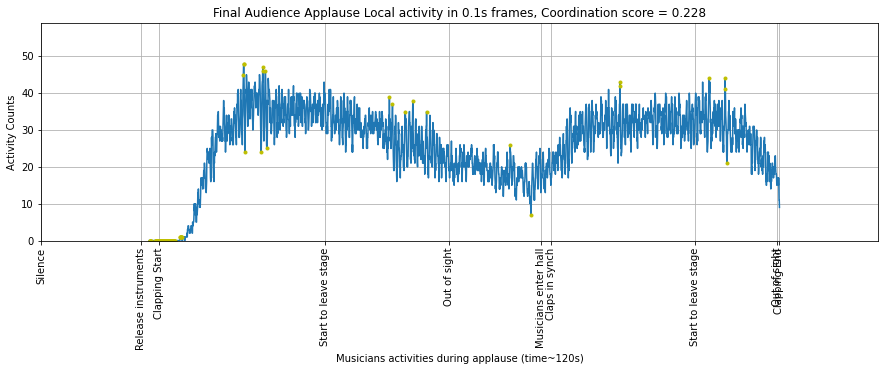

In [121]:
# demonstrate coordination 
actType = 'UBound'
HopSize = 0.02
Thresh = 0.5
FrameSize = 0.1
Acts=aa.activityCount(df_claps,FrameSize,HopSize,Thresh,actType)
Acts= Acts.fillna(0)
# include performers
Data = Acts.drop(columns=['Total']) # we drop the ratio to just have the sampled events 
                                    # for the nonparametric local activity test
    
ShuffleRange = 1
Iter = 1000
alpha = 0.005
tic = time.time()
stest = aa.localActivityTest(Data,FrameSize,ShuffleRange,Iter,alpha)
print(time.time()-tic)
stest

A = stest['MeasuredResults']
B = stest['ActivityPeaks']
C = stest['CoordScore']
# plot the activity levels with local activity peaks
fig = A['Activity-levels'].plot(figsize=[15,4])
if C >=-np.log10(alpha):
    B['Activity-levels'].plot(style='r.')
else:
    B['Activity-levels'].plot(style='y.')
plt.ylim([0,59])
plt.xlim([6.5,70])
plt.xlabel('Time (s)')
plt.ylabel('Activity Counts')
plt.grid()
plt.title('Schnittke Audience Applause Local activity in ' + str(FrameSize) + 's frames, Coordination score = '+str(round(stest['CoordScore'],3)))
plt.savefig('Applause_Schnittke_Alignment_005_s.png',dpi = 400)
plt.show()


fig = A['Activity-levels'].plot(figsize=[15,4])
if C >=-np.log10(alpha):
    B['Activity-levels'].plot(style='r.')
else:
    B['Activity-levels'].plot(style='y.')
plt.ylim([0,59])
plt.xlim([6.5,70])
plt.xlabel('Time (s)')
plt.xticks(musician_times.TIME,musician_times.LABEL, rotation='vertical')
plt.xlabel('Musicians activities during applause (time~120s)')
plt.ylabel('Activity Counts')
plt.grid()
plt.title('Final Audience Applause Local activity in ' + str(FrameSize) + 's frames, Coordination score = '+str(round(stest['CoordScore'],3)))
plt.savefig('Applause_Schnittke_Alignment_005_ME.png',dpi = 400)
plt.show()

In [123]:
# build database of clapping behaviour over measured intervals
t_interval = 1.5
sampletimes = np.arange(0+t_interval,70-t_interval,0.5)
Clap_Feats = pd.DataFrame(index = sampletimes,columns = df_OnlyClaps.columns)

for samp in range(len(sampletimes)):
    t_0 = sampletimes[samp]
    sub_claps = df_OnlyClaps.loc[t_0-t_interval:t_0+t_interval,:] # Excerpt of claps
    clap_stats = []
    cols = sub_claps.columns
    these_claps = pd.Series(index = df_OnlyClaps.columns,dtype='float64')
    for partn in cols:
        ici = pd.Series(sub_claps.loc[sub_claps.loc[:,partn]>0].index,dtype='float64').diff()
        if ici.notna().sum()>0:
            these_claps[partn]=np.nanmedian(ici)
    Clap_Feats.loc[t_0,:] = these_claps
Clap_Feats.loc[25:30]

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
25.0,NaN,0.28,0.34,0.38,0.4,0.3,NaN,0.36,0.3,0.33,...,0.3,NaN,0.4,0.33,NaN,0.42,0.28,0.3,0.65,0.31
25.5,NaN,0.28,0.34,0.42,0.4,0.3,NaN,0.36,0.3,0.32,...,0.3,NaN,0.42,0.32,NaN,0.44,0.28,0.32,0.66,0.3
26.0,NaN,0.28,0.34,0.57,0.4,0.3,NaN,0.34,0.3,0.32,...,0.32,NaN,0.4,0.36,NaN,0.46,0.28,0.32,0.66,0.32
26.5,NaN,0.29,0.34,0.57,0.41,0.3,NaN,0.32,0.3,0.32,...,0.32,NaN,0.36,0.34,NaN,0.46,0.27,0.32,0.66,0.86
27.0,NaN,0.3,0.34,0.4,0.42,0.3,0.24,0.33,0.3,0.32,...,0.32,NaN,0.36,0.34,NaN,0.44,0.26,0.36,1.34,0.58
27.5,NaN,0.28,0.34,0.38,0.42,0.3,0.24,0.33,0.31,0.37,...,0.34,NaN,0.36,0.32,NaN,0.46,0.26,0.36,1.25,0.58
28.0,NaN,0.28,0.34,0.38,0.42,0.47,0.24,0.33,0.31,0.38,...,0.34,NaN,0.36,0.32,NaN,0.44,0.26,0.34,0.5,NaN
28.5,NaN,0.3,0.34,0.38,0.42,0.7,0.24,0.32,0.3,0.38,...,0.32,NaN,0.36,0.33,NaN,0.65,0.26,0.34,0.6,1.33
29.0,NaN,0.29,0.33,0.38,0.42,0.62,0.24,0.32,0.3,0.38,...,0.32,NaN,0.36,0.34,0.8,0.34,0.26,0.34,0.58,0.22
29.5,NaN,0.28,0.32,0.36,0.43,0.38,0.2,0.32,0.32,0.38,...,0.32,NaN,NaN,0.34,0.71,NaN,0.26,0.33,0.58,0.22


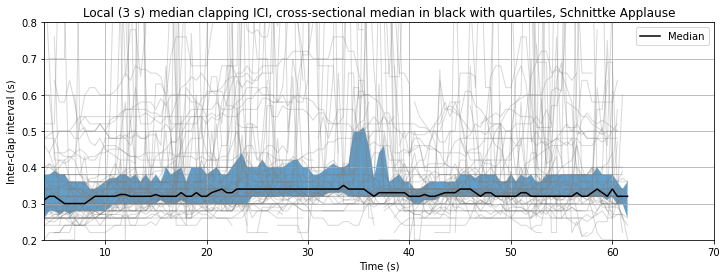

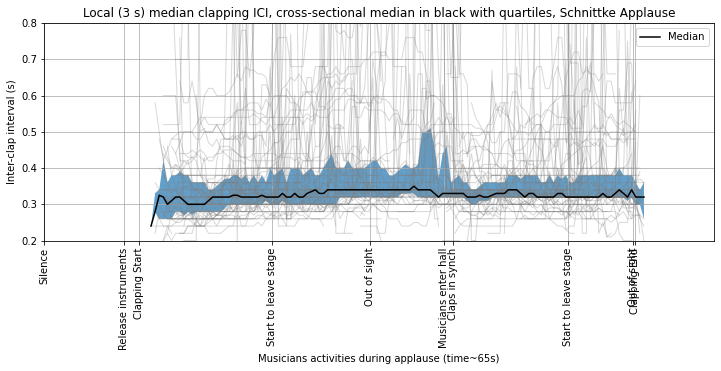

In [124]:
# pull out the quartile time series, allowing for nans
# 
df_A = Clap_Feats.copy()
df_feats = pd.DataFrame(index = df_A.index,columns= ['Median','LowerQ','UpperQ','Midrange','NotNa_C','NotNa_p'])
t_interval = 3

for i, row in df_A.iterrows():
    sub_row = row[row.notna()]
    if len(sub_row)>0:
        these_stats = {'Median':np.median(sub_row),'LowerQ':sub_row.quantile(q=0.25,interpolation='nearest'),'UpperQ':sub_row.quantile(q=0.75,interpolation='nearest'),
                       'Midrange':np.round(sub_row.quantile(q=0.75,interpolation='nearest')-sub_row.quantile(q=0.25,interpolation='nearest'),5),'NotNa_C':len(sub_row),'NotNa_p':len(sub_row)/len(row)}
        df_feats.loc[i,:] = these_stats
df_feats = df_feats.dropna()

#df_feats.loc[:10]

fig,ax = plt.subplots(1,1,figsize=[12,4])
df_A.plot(linewidth=1,color='grey',alpha=0.3,legend=False,ax = ax)
#ax.line(df_A.index,df_A)
df_feats.plot(y='Median',color="black", ax=ax)
x = np.array(df_feats.index)
y1 = np.array(df_feats.LowerQ,dtype=np.float32)
y2 = np.array(df_feats.UpperQ,dtype=np.float32)
ax.fill_between(x,y1,y2,alpha = 0.7)
plt.ylim([0.2,0.8])
plt.xlim([4,70])
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Inter-clap interval (s)')
plt.title('Local (3 s) median clapping ICI, cross-sectional median in black with quartiles, Schnittke Applause')
plt.savefig('SchnittkeApplause_Local_ICI_medians_QuartileTS.png',dpi=400)
plt.show()



fig,ax = plt.subplots(1,1,figsize=[12,4])
df_A.plot(linewidth=1,color='grey',alpha=0.3,legend=False,ax = ax)
#ax.line(df_A.index,df_A)
df_feats.plot(y='Median',color="black", ax=ax)
x = np.array(df_feats.index)
y1 = np.array(df_feats.LowerQ,dtype=np.float32)
y2 = np.array(df_feats.UpperQ,dtype=np.float32)
ax.fill_between(x,y1,y2,alpha = 0.7)
plt.ylim([0.2,0.8])
plt.xlim([4,70])
plt.xticks(musician_times.TIME,musician_times.LABEL, rotation='vertical')
plt.grid()
plt.xlabel('Musicians activities during applause (time~65s)')
plt.ylabel('Inter-clap interval (s)')
plt.title('Local (3 s) median clapping ICI, cross-sectional median in black with quartiles, Schnittke Applause')
plt.savefig('SchnittkeApplause_Local_ICI_medians_QuartileTS_MusEv.png',dpi=400)
plt.show()

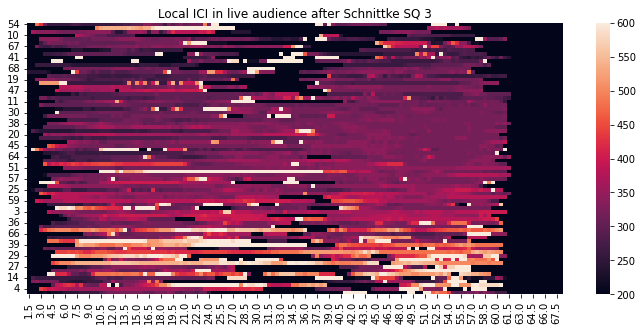

In [125]:
# now to show these as individual sequences
# sorted by distance from the median local ICI time series across audience, not absolute
#dists = Clap_Feats.sub(Clap_Feats.median(axis=1),axis = 0).sum()
feat_set = Clap_Feats.loc[40:60].copy()
feat_set.fillna(0,inplace=True)
dists = abs(feat_set.sub(feat_set.median(axis=1),axis = 0)).sum()*np.sign(feat_set.sub(feat_set.median(axis=1),axis = 0).sum())

df_A = Clap_Feats[dists.sort_values().index].copy()*1000 # convert to milliseconds
df_A.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize = [12,5])
chart = sns.heatmap(data=df_A.transpose(), ax=ax,vmin=200, vmax=600)
plt.title('Local ICI in live audience after Schnittke SQ 3')
ax.set_xticklabels(np.round(df_A.iloc[ax.get_xticks()].index,2))
plt.savefig('claps_schnittke_heatRough.png')
plt.show()


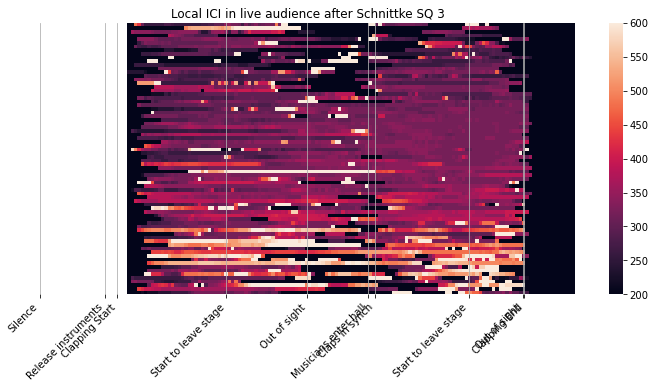

In [127]:
# now to show these as individual sequences
# sorted by distance from the median local ICI time series across audience, not absolute
feat_set = Clap_Feats.loc[40:60].copy()
feat_set.fillna(0,inplace=True)
dists = abs(feat_set.sub(feat_set.median(axis=1),axis = 0)).sum()*np.sign(feat_set.sub(feat_set.median(axis=1),axis = 0).sum())

df_A = Clap_Feats[dists.sort_values().index].copy()*1000 # convert to milliseconds
df_A.fillna(0,inplace=True)
# df_A.drop(61,axis = 1,inplace=True)
# df_A.drop(11,axis = 1,inplace=True)
fig, ax = plt.subplots(figsize = [12,5])
chart = sns.heatmap(data=df_A.transpose(), ax=ax,vmin=200, vmax=600)
plt.title('Local ICI in live audience after Schnittke SQ 3')
ax.set_xticklabels(np.round(df_A.iloc[ax.get_xticks()].index,2))

plt.xticks(musician_times.TIME,musician_times.LABEL, rotation=45,ha='right')

new_xticks = len(df_A)*(musician_times.TIME-df_A.index[0])/(df_A.index[-1]-df_A.index[0])
# plt.xticks(new_xticks,seg_times.Event, rotation='20',fontsize=8)
ax.set_xticks(new_xticks)
ax.set_xticklabels(musician_times.LABEL)
ax.set_yticks([])
ax.grid()

plt.savefig('claps_ICI_Schnittke_heatRoughsort_ME.png')
plt.show()


# Beethoven applause
Without synchronisation, as far as we can tell

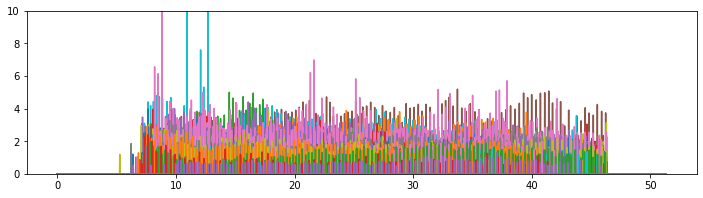

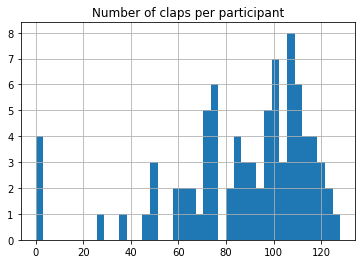

In [233]:
peaks = pd.read_csv(claps_folder + 'beethoven_applause_peaks.csv',index_col=0)
peaks = peaks.fillna(0)
#peaks.drop(columns=['index'],inplace = True)
peaks_IDs = peaks.columns
ts = pd.Series(np.arange(0,len(peaks))*0.02)
df_claps = pd.DataFrame(index = ts,data = peaks.values)
df_claps.plot(figsize = [12,3],legend = False)
plt.ylim([0,10])
plt.show()

# drop the clap amplitude for simpler analysis and count claps per participant
df_OnlyClaps = df_claps.astype(bool).astype(int)
df_OnlyClaps.sum().hist(bins = 40)
plt.title('Number of claps per participant')
plt.show()

In [234]:
# reduce the analysis set to only those recordings with a minimum number of claps for this interval (20).
a = df_OnlyClaps.sum().index
print([len(a),len(a[df_OnlyClaps.sum()>20])])

# reduce analysis set to only those responses with claps detected
df_claps = df_claps.loc[:,a[df_OnlyClaps.sum()>20]]
claps_ID = peaks_IDs[a[df_OnlyClaps.sum()>20]] # the participant identifiers matching df_clap columns, in case of need
df_claps.columns = range(df_claps.columns.size)
df_OnlyClaps = df_claps.astype(bool).astype(int)

[85, 81]


In [236]:
last_claps =df_claps.where(df_claps!=0).last_valid_index()
last_claps

46.34

Median time to start clapping: 7.98s
Inner quartile range: 1.2s


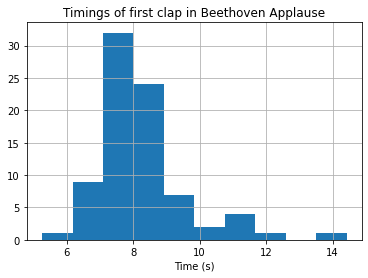

In [235]:
# Time to first clap.
first_claps =df_claps.ne(0).idxmax()
fig = first_claps.hist()
plt.xlabel('Time (s)')
plt.title('Timings of first clap in Beethoven Applause')

print('Median time to start clapping: ' + str(np.round(first_claps.median(),3)) + 's\nInner quartile range: ' + str(np.round(first_claps.quantile(0.75)-first_claps.quantile(0.25),3)) + 's')

56.858245849609375


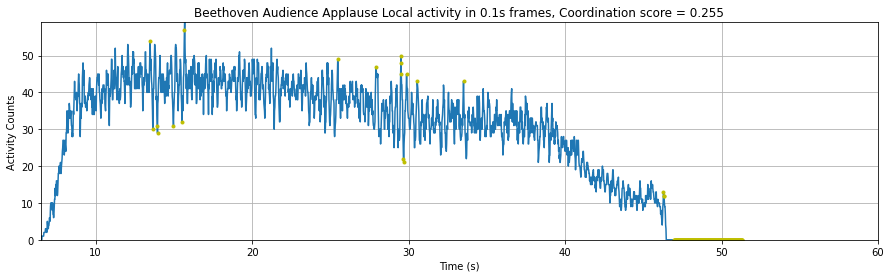

In [238]:
# demonstrate coordination 
actType = 'UBound'
HopSize = 0.02
Thresh = 0.5
FrameSize = 0.1
Acts=aa.activityCount(df_claps,FrameSize,HopSize,Thresh,actType)
Acts= Acts.fillna(0)
# include performers
Data = Acts.drop(columns=['Total']) # we drop the ratio to just have the sampled events 
                                    # for the nonparametric local activity test
    
ShuffleRange = 1
Iter = 1000
alpha = 0.005
tic = time.time()
stest = aa.localActivityTest(Data,FrameSize,ShuffleRange,Iter,alpha)
print(time.time()-tic)
stest

A = stest['MeasuredResults']
B = stest['ActivityPeaks']
C = stest['CoordScore']
# plot the activity levels with local activity peaks
fig = A['Activity-levels'].plot(figsize=[12,4])
if C >=-np.log10(alpha):
    B['Activity-levels'].plot(style='r.')
else:
    B['Activity-levels'].plot(style='y.')
plt.ylim([0,59])
plt.xlim([6.5,60])
plt.xlabel('Time (s)')
plt.ylabel('Activity Counts')
plt.grid()
plt.title('Beethoven Audience Applause Local activity in ' + str(FrameSize) + 's frames, Coordination score = '+str(round(stest['CoordScore'],3)))
plt.savefig('Applause_Beethoven_Alignment_005_s.png',dpi = 400)
plt.show()


# fig = A['Activity-levels'].plot(figsize=[20,4])
# if C >=-np.log10(alpha):
#     B['Activity-levels'].plot(style='r.')
# else:
#     B['Activity-levels'].plot(style='y.')
# plt.ylim([0,59])
# plt.xlim([6.5,70])
# plt.xlabel('Time (s)')
# plt.xticks(musician_times.TIME,musician_times.LABEL, rotation='vertical')
# plt.xlabel('Musicians activities during applause (time~120s)')
# plt.ylabel('Activity Counts')
# plt.grid()
# plt.title('Final Audience Applause Local activity in ' + str(FrameSize) + 's frames, Coordination score = '+str(round(stest['CoordScore'],3)))
# plt.savefig('Applause_Schnittke_Alignment_005_ME.png',dpi = 400)
# plt.show()

In [239]:
# build database of clapping behaviour over measured intervals
t_interval = 1.5
sampletimes = np.arange(0+t_interval,50-t_interval,0.5)
Clap_Feats = pd.DataFrame(index = sampletimes,columns = df_OnlyClaps.columns)

for samp in range(len(sampletimes)):
    t_0 = sampletimes[samp]
    sub_claps = df_OnlyClaps.loc[t_0-t_interval:t_0+t_interval,:] # Excerpt of claps
    clap_stats = []
    cols = sub_claps.columns
    these_claps = pd.Series(index = df_OnlyClaps.columns,dtype='float64')
    for partn in cols:
        ici = pd.Series(sub_claps.loc[sub_claps.loc[:,partn]>0].index,dtype='float64').diff()
        if ici.notna().sum()>0:
            these_claps[partn]=np.nanmedian(ici)
    Clap_Feats.loc[t_0,:] = these_claps
Clap_Feats.loc[25:30]

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
25.0,0.31,0.26,0.28,0.32,0.32,0.32,0.28,0.36,0.36,0.38,...,0.3,0.27,0.34,0.35,0.34,NaN,0.3,0.3,0.55,0.26
25.5,0.32,0.26,0.28,0.32,0.32,0.32,0.32,0.38,0.38,0.39,...,0.32,0.28,0.34,0.35,0.34,NaN,0.29,0.3,0.54,0.26
26.0,0.32,0.26,0.28,0.32,0.32,0.32,0.32,0.36,0.36,0.4,...,0.3,0.28,0.34,0.35,0.35,NaN,0.28,0.31,0.51,0.26
26.5,0.32,0.26,0.28,0.32,0.32,0.32,0.32,0.36,0.36,0.42,...,0.3,0.28,0.34,0.33,0.35,NaN,0.28,0.33,0.51,0.26
27.0,0.32,0.26,0.28,0.32,0.34,0.32,0.32,0.37,0.36,0.42,...,0.3,0.28,0.34,0.33,0.34,NaN,0.28,0.34,0.5,0.28
27.5,0.32,0.26,0.28,0.32,0.34,0.32,0.36,0.36,0.35,0.42,...,0.3,0.28,0.35,0.32,0.32,NaN,0.3,0.35,0.5,0.28
28.0,0.31,0.27,0.28,0.32,0.34,0.32,0.36,0.34,0.34,0.42,...,0.3,0.28,0.34,0.32,0.32,NaN,0.3,0.34,0.5,0.28
28.5,0.3,0.27,0.28,NaN,0.34,0.32,0.32,0.37,0.34,0.42,...,0.3,0.28,0.36,0.32,0.34,0.58,0.3,0.34,0.5,0.3
29.0,0.3,0.26,0.29,NaN,0.34,0.32,0.32,0.36,0.34,0.43,...,0.31,0.28,0.34,0.32,NaN,0.58,0.3,0.34,0.5,0.3
29.5,0.3,0.26,0.3,NaN,0.34,0.32,0.3,0.36,0.34,0.44,...,0.32,0.28,0.34,0.32,NaN,0.58,0.3,0.33,0.54,0.32


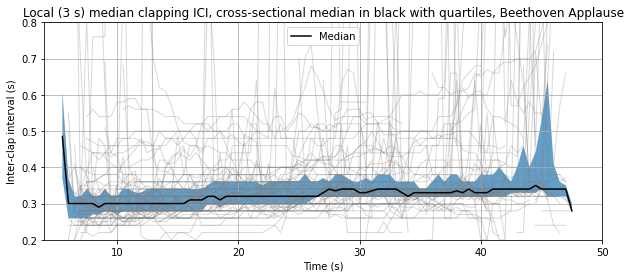

In [244]:
# pull out the quartile time series, allowing for nans
# 
df_A = Clap_Feats.copy()
df_feats = pd.DataFrame(index = df_A.index,columns= ['Median','LowerQ','UpperQ','Midrange','NotNa_C','NotNa_p'])
t_interval = 3

for i, row in df_A.iterrows():
    sub_row = row[row.notna()]
    if len(sub_row)>0:
        these_stats = {'Median':np.median(sub_row),'LowerQ':sub_row.quantile(q=0.25,interpolation='nearest'),'UpperQ':sub_row.quantile(q=0.75,interpolation='nearest'),
                       'Midrange':np.round(sub_row.quantile(q=0.75,interpolation='nearest')-sub_row.quantile(q=0.25,interpolation='nearest'),5),'NotNa_C':len(sub_row),'NotNa_p':len(sub_row)/len(row)}
        df_feats.loc[i,:] = these_stats
df_feats = df_feats.dropna()

#df_feats.loc[:10]

fig,ax = plt.subplots(1,1,figsize=[10,4])
df_A.plot(linewidth=1,color='grey',alpha=0.3,legend=False,ax = ax)
#ax.line(df_A.index,df_A)
df_feats.plot(y='Median',color="black", ax=ax)
x = np.array(df_feats.index)
y1 = np.array(df_feats.LowerQ,dtype=np.float32)
y2 = np.array(df_feats.UpperQ,dtype=np.float32)
ax.fill_between(x,y1,y2,alpha = 0.7)
plt.ylim([0.2,0.8])
plt.xlim([4,50])
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Inter-clap interval (s)')
plt.title('Local (3 s) median clapping ICI, cross-sectional median in black with quartiles, Beethoven Applause')
plt.savefig('BeethovenApplause_Local_ICI_medians_QuartileTS.png',dpi=400)
plt.show()

# fig,ax = plt.subplots(1,1,figsize=[15,4])
# df_A.plot(linewidth=1,color='grey',alpha=0.3,legend=False,ax = ax)
# #ax.line(df_A.index,df_A)
# df_feats.plot(y='Median',color="black", ax=ax)
# x = np.array(df_feats.index)
# y1 = np.array(df_feats.LowerQ,dtype=np.float32)
# y2 = np.array(df_feats.UpperQ,dtype=np.float32)
# ax.fill_between(x,y1,y2,alpha = 0.7)
# plt.ylim([0.2,0.8])
# plt.xlim([4,70])
# plt.xticks(musician_times.TIME,musician_times.LABEL, rotation='vertical')
# plt.grid()
# plt.xlabel('Musicians activities during applause (time~65s)')
# plt.ylabel('Inter-clap interval (s)')
# plt.title('Local (3 s) median clapping ICI, cross-sectional median in black with quartiles')
# plt.savefig('SchnittkeApplause_Local_ICI_medians_QuartileTS_MusEv.png',dpi=400)
# plt.show()

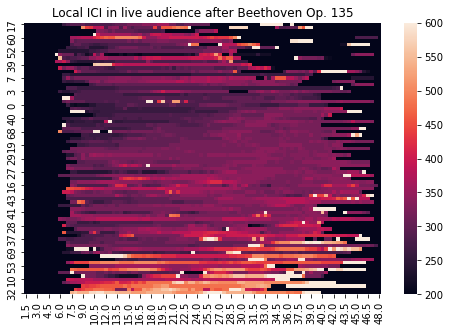

In [243]:
# now to show these as individual sequences
# sorted by distance from the median local ICI time series across audience, not absolute
#dists = Clap_Feats.sub(Clap_Feats.median(axis=1),axis = 0).sum()
feat_set = Clap_Feats.loc[20:40].copy()
feat_set.fillna(0,inplace=True)
dists = abs(feat_set.sub(feat_set.median(axis=1),axis = 0)).sum()*np.sign(feat_set.sub(feat_set.median(axis=1),axis = 0).sum())

df_A = Clap_Feats[dists.sort_values().index].copy()*1000 # convert to milliseconds
df_A.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize = [8,5])
chart = sns.heatmap(data=df_A.transpose(), ax=ax,vmin=200, vmax=600)
plt.title('Local ICI in live audience after Beethoven Op. 135')
ax.set_xticklabels(np.round(df_A.iloc[ax.get_xticks()].index,2))
plt.savefig('claps_Beethoven_heatRough.png')
plt.show()


# Participant stats
how do people clap over the course of the concert? Extract traits across all clapping instances, per participant

1. Median ICI
2. Quartile ICI range
3. Time of first clap
4. Time of second to last clap
5. Number of claps
6. duration of claps (second from first to second to last)?

In [11]:
alignedParts

,Participant_Code,Participant_Number,Attendance,Questionnaire_Language,Motion_Quality,Link_Conflicts,Seat_Zone,Location,Longitude_Truncated,Lattitude_Truncated,Offset_1,Offset_2,Watch_Alone
0,ADQ001,1,A,D,Q,0,6.0,NaN,NaN,NaN,0.14,0.16,0.0
1,ADQ002,2,A,D,Q,0,3.0,NaN,NaN,NaN,NaN,-0.36,0.0
2,ADQ003,3,A,D,Q,0,2.0,NaN,NaN,NaN,0.88,1.02,0.0
3,ADQ004,4,A,D,Q,0,4.0,NaN,NaN,NaN,0.44,0.62,1.0
4,ADQ005,5,A,D,Q,0,4.0,NaN,NaN,NaN,0.04,0.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,AEQ086,86,A,E,Q,0,5.0,NaN,NaN,NaN,NaN,0.34,0.0
81,AEQ087,87,A,E,Q,1,3.0,NaN,NaN,NaN,0.12,0.28,0.0
82,AEQ088,88,A,E,Q,0,2.0,NaN,NaN,NaN,0.10,0.06,0.0
83,AEQ089,89,A,E,Q,0,4.0,NaN,NaN,NaN,0.28,0.38,0.0


In [10]:
#Clappers = alignedParts.loc[:,['Participant_Code','Questionnaire_Language','Seat_Zone','Watch_Alone']].copy()
Clappers = pd.DataFrame(index = alignedParts['Participant_Code'])

In [9]:
claps_folder = 'C:/Users/finnu/dev/copenhagen-musiclab-clapping/clapfiles/clapping_peaks/'

applauses = os.listdir(claps_folder)
len(applauses)

16

In [11]:
claps = applauses[1]
peaks = pd.read_csv(claps_folder + claps,index_col=0)

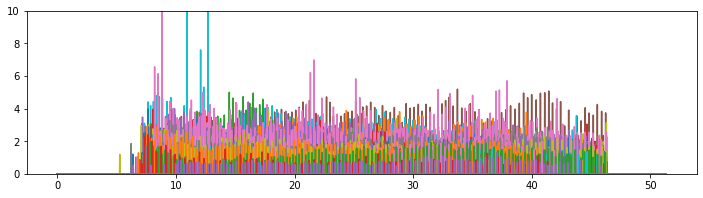

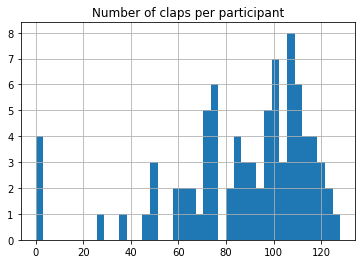

In [12]:
peaks = peaks.fillna(0)
#peaks.drop(columns=['index'],inplace = True)
peaks_IDs = peaks.columns
ts = pd.Series(np.arange(0,len(peaks))*0.02)
df_claps = pd.DataFrame(index = ts,data = peaks.values)
df_claps.plot(figsize = [12,3],legend = False)
plt.ylim([0,10])
plt.show()

# drop the clap amplitude for simpler analysis and count claps per participant
df_OnlyClaps = df_claps.astype(bool).astype(int)
df_OnlyClaps.sum().hist(bins = 40)
plt.title('Number of claps per participant')
plt.show()
    

In [ ]:
# reduce the analysis set to only those recordings with a minimum number of claps for this interval (20).
a = df_OnlyClaps.sum().index
print([len(a),len(a[df_OnlyClaps.sum()>20])])

# reduce analysis set to only those responses with claps detected
df_claps = df_claps.loc[:,a[df_OnlyClaps.sum()>20]]
claps_ID = peaks_IDs[a[df_OnlyClaps.sum()>20]] # the participant identifiers matching df_clap columns, in case of need
df_claps.columns = range(df_claps.columns.size)
df_OnlyClaps = df_claps.astype(bool).astype(int)

In [ ]:
last_claps =df_claps.where(df_claps!=0).last_valid_index()
last_claps
# Time to first clap.
first_claps =df_claps.ne(0).idxmax()
fig = first_claps.hist()
plt.xlabel('Time (s)')
plt.title('Timings of first clap in Beethoven Applause')

print('Median time to start clapping: ' + str(np.round(first_claps.median(),3)) + 's\nInner quartile range: ' + str(np.round(first_claps.quantile(0.75)-first_claps.quantile(0.25),3)) + 's')